
**Combined measurement of ECG, Breathing and Seismocardiograms (CEBSDB): ECG Data Preprocessing and Feature Extraction**

1. **Read and Preprocess ECG Data**:  
   This code reads ECG signals for each record in the "cebsdb" dataset, flattens the signals, and generates timestamps for each data point.

2. **Extract Signal Peaks**:  
   It sorts the ECG data by signal strength and selects the top 2.5% of values to identify prominent peaks.

3. **Calculate RR Intervals**:  
   Based on the selected peaks, the code calculates RR intervals (time differences between successive R-peaks) and filters out intervals shorter than 0.5 seconds to remove noise.

4. **Save Processed Data**:  
   The filtered RR intervals are saved as separate CSV files for each record.

5. **Visualize ECG Data and Intervals**:  
   For one specific record, the code visualizes the ECG waveform and generates histograms of the RR interval distribution, providing insight into heart rate variability and other cardiac features.


In [4]:
pip install wfdb

In [24]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os.path as osp

In [6]:
for j in range(10, 21):
  filename = ('cebsdb/b0' + '%d') %j
  record = wfdb.rdrecord(filename,  channels=[1], pn_dir='cebsdb/1.0.0/')

  ecg_signal = record.p_signal.flatten()

  # Generate the time stamps for each sample
  times = np.arange(0, len(record.p_signal))/record.fs

  df_x_y = pd.DataFrame({'time':times, 'signal':ecg_signal})
  df_y_sorted = df_x_y.sort_values(by='signal')
  df_y_subset = df_y_sorted[int(df_y_sorted.shape[0] - 0.025*df_y_sorted.shape[0]):]
  df_y_subset_sort = pd.DataFrame.sort_index(df_y_subset)
  df_y_subset_index = df_y_subset_sort.reset_index()
  df_y_subset_index

  rr_int = []
  for i in range(df_y_subset_index.shape[0]-1):
    interval = df_y_subset_index.time[i+1] - df_y_subset_index.time[i]
    rr_int.append(interval)

  rr_int = np.array(rr_int)

  rr_int_real = rr_int[np.where(rr_int > 0.5)]

  name = ("cebsdb_b0" + "%d" + "_rr_interval.csv")%j
  with open(name, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(['R-R Interval (Samples)'])
      for interval in rr_int_real:
          writer.writerow([interval*1000])

In [7]:
record = wfdb.rdrecord('cebsdb/b003',  channels=[1], pn_dir='cebsdb/1.0.0/')
annotation = wfdb.rdann('b003', 'atr',  pn_dir='cebsdb/1.0.0/')

Text(0.5, 1.0, 'ECG signal')

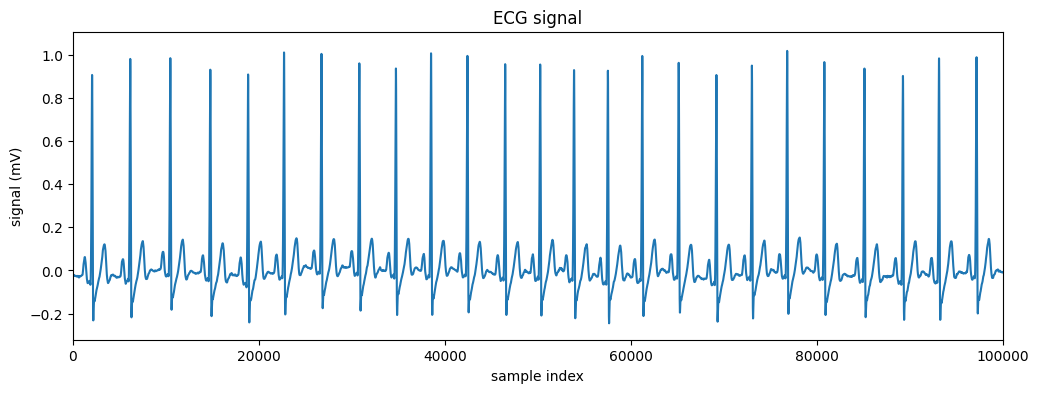

In [8]:
plt.figure(figsize=(12,4))
plt.plot(record.p_signal)
plt.xlim(0, 100000)
plt.xlabel("sample index")
plt.ylabel("signal (mV)")
plt.title("ECG signal")


In [9]:
ecg_signal = record.p_signal.flatten()

# Generate the time stamps for each sample
times = np.arange(0, len(record.p_signal))/record.fs
times.shape

df_x_y = pd.DataFrame({'time':times, 'signal':ecg_signal})
df_y_sorted = df_x_y.sort_values(by='signal')
df_y_subset = df_y_sorted[int(df_y_sorted.shape[0] - 0.025*df_y_sorted.shape[0]):]
df_y_subset_sort = pd.DataFrame.sort_index(df_y_subset)
df_y_subset_index = df_y_subset_sort.reset_index()
df_y_subset_index

,index,time,signal
0,2024,0.4048,0.517758
1,2025,0.4050,0.528384
2,2026,0.4052,0.538692
3,2027,0.4054,0.549318
4,2028,0.4056,0.559943
...,...,...,...
37495,1497543,299.5086,0.573701
37496,1497544,299.5088,0.559012
37497,1497545,299.5090,0.544322
37498,1497546,299.5092,0.529633


In [10]:
rr_int = []
for i in range(df_y_subset_index.shape[0]-1):
  interval = df_y_subset_index.time[i+1] - df_y_subset_index.time[i]
  rr_int.append(interval)
len(rr_int)

37499

Text(0.5, 1.0, 'distribution of interval values')

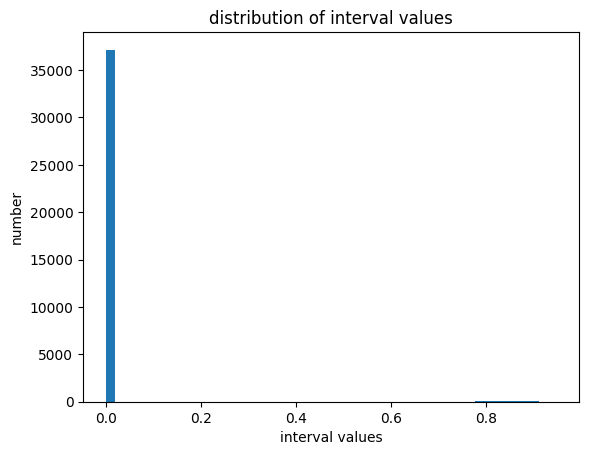

In [11]:
rr_int = np.array(rr_int)
plt.hist(rr_int, bins=50)
plt.xlabel("interval values")
plt.ylabel("number")
#plt.xlim(0.5, 1)
#plt.ylim(0, 300)
plt.title("distribution of interval values")

In [12]:
rr_int_real = rr_int[np.where(rr_int > 0.5)]
rr_int_real

array([0.8   , 0.8396, 0.8388, 0.7928, 0.7514, 0.7828, 0.7924, 0.7656,
       0.7336, 0.7604, 0.79  , 0.7314, 0.7076, 0.7074, 0.7178, 0.7622,
       0.7904, 0.7428, 0.7374, 0.777 , 0.8416, 0.808 , 0.7554, 0.7848,
       0.8604, 0.8846, 0.8018, 0.8054, 0.8388, 0.8718, 0.8158, 0.7826,
       0.8386, 0.8806, 0.8666, 0.798 , 0.8078, 0.8516, 0.8536, 0.7926,
       0.774 , 0.8318, 0.898 , 0.8584, 0.797 , 0.8252, 0.8692, 0.8464,
       0.8024, 0.8486, 0.908 , 0.854 , 0.805 , 0.839 , 0.897 , 0.9048,
       0.819 , 0.8302, 0.8656, 0.9136, 0.8414, 0.7942, 0.8358, 0.8914,
       0.8548, 0.8048, 0.8488, 0.9   , 0.8996, 0.817 , 0.8328, 0.8706,
       0.8682, 0.7988, 0.7986, 0.8428, 0.8914, 0.8384, 0.7884, 0.8094,
       0.8762, 0.9062, 0.8156, 0.8264, 0.8814, 0.9018, 0.834 , 0.82  ,
       0.8524, 0.8866, 0.842 , 0.7906, 0.8316, 0.8988, 0.8956, 0.8282,
       0.8482, 0.8822, 0.8704, 0.8246, 0.7804, 0.8232, 0.8908, 0.843 ,
       0.7894, 0.825 , 0.8648, 0.8534, 0.7844, 0.801 , 0.8468, 0.8926,
      

(347,)

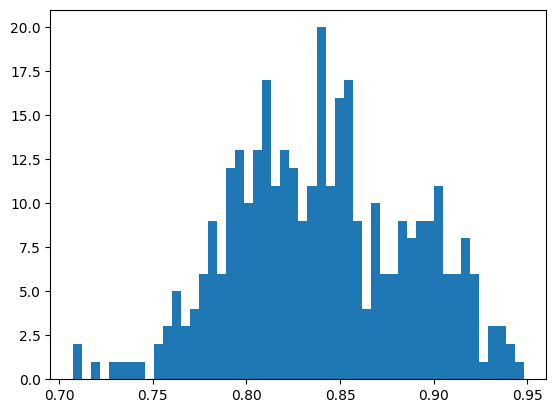

In [13]:
plt.hist(rr_int_real, bins=50)
rr_int_real.shape

In [14]:
sorted_signal = np.sort(ecg_signal)
sorted_signal

array([-0.25665882, -0.25665882, -0.25665882, ...,  1.0421573 ,
        1.0421573 ,  1.04247448])

(array([ 620.,  603.,  590.,  592.,  619.,  601.,  579.,  607.,  614.,
         577.,  602.,  597.,  604.,  607.,  608.,  607.,  615.,  615.,
         641.,  638.,  637.,  663.,  663.,  662.,  681.,  708.,  709.,
         744.,  739.,  792.,  802.,  858.,  881.,  917.,  981., 1078.,
        1244., 1420., 1502., 1517., 1391., 1256., 1115., 1009.,  917.,
         660.,  440.,  297.,   63.,   18.]),
 array([0.50776697, 0.51846112, 0.52915527, 0.53984942, 0.55054357,
        0.56123772, 0.57193187, 0.58262602, 0.59332017, 0.60401432,
        0.61470847, 0.62540262, 0.63609677, 0.64679092, 0.65748507,
        0.66817922, 0.67887337, 0.68956752, 0.70026167, 0.71095582,
        0.72164997, 0.73234412, 0.74303827, 0.75373242, 0.76442658,
        0.77512073, 0.78581488, 0.79650903, 0.80720318, 0.81789733,
        0.82859148, 0.83928563, 0.84997978, 0.86067393, 0.87136808,
        0.88206223, 0.89275638, 0.90345053, 0.91414468, 0.92483883,
        0.93553298, 0.94622713, 0.95692128, 0.96761543, 

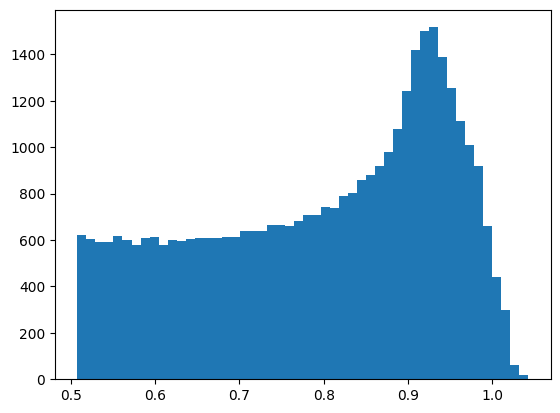

In [15]:
subset = sorted_signal[int(sorted_signal.shape[0] - 0.025*sorted_signal.shape[0]):]
subset.shape
plt.hist(subset, bins=50)

In [61]:
# Generate the time stamps for each sample
times = np.arange(0, len(record.p_signal))/record.fs
# Get the time stamps for each R-peak
r_peak_times = [times[i] for i in annotation.sample]

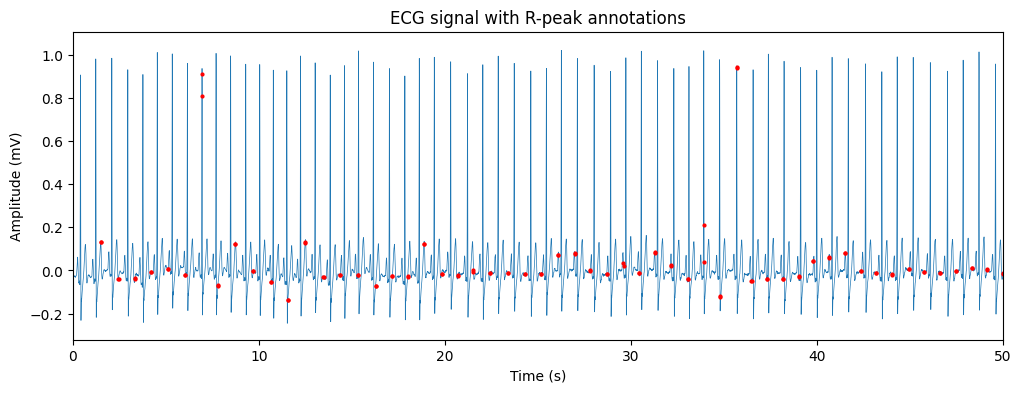

In [62]:
# Plot the ECG signal and R-peak annotations
plt.figure(figsize=(12,4))
plt.plot(times, record.p_signal, linewidth=0.5)
plt.plot(r_peak_times, record.p_signal[annotation.sample], 'ro', markersize=2)
plt.xlim(0, 50)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('ECG signal with R-peak annotations')
plt.show()

In [52]:
rr_int = []
rr_times = []
for i in range(1, len(r_peak_times)):
  gap = r_peak_times[i] - r_peak_times[i-1]
  if (gap * 1000) > 50:
    rr_times.append(r_peak_times[i])
    rr_int.append(gap * 1000)

(array([ 1.,  0.,  0.,  2.,  3.,  3.,  8.,  6.,  8., 10., 16.,  7., 14.,
        17., 21.,  9., 14., 12., 12., 19., 15., 13., 14., 20., 13., 14.,
        16.,  6., 11.,  7.,  5.,  4.,  5.,  4.,  3.,  1.,  4.,  1.,  3.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 753.6 ,  759.36,  765.12,  770.88,  776.64,  782.4 ,  788.16,
         793.92,  799.68,  805.44,  811.2 ,  816.96,  822.72,  828.48,
         834.24,  840.  ,  845.76,  851.52,  857.28,  863.04,  868.8 ,
         874.56,  880.32,  886.08,  891.84,  897.6 ,  903.36,  909.12,
         914.88,  920.64,  926.4 ,  932.16,  937.92,  943.68,  949.44,
         955.2 ,  960.96,  966.72,  972.48,  978.24,  984.  ,  989.76,
         995.52, 1001.28, 1007.04, 1012.8 , 1018.56, 1024.32, 1030.08,
        1035.84, 1041.6 ]),
 <BarContainer object of 50 artists>)

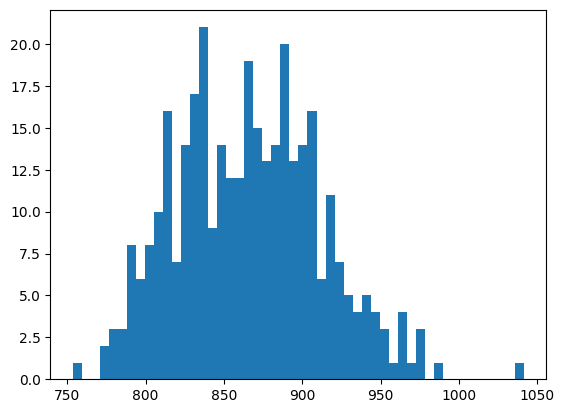

In [63]:
plt.hist(rr_int, bins=50)

In [54]:
print(len(rr_int))
print(rr_int)

343
[957.4, 885.3999999999997, 841.5999999999997, 920.7999999999998, 942.2000000000006, 892.1999999999999, 847.3999999999995, 931.6000000000005, 975.8000000000013, 965.399999999999, 877.0000000000007, 926.1999999999997, 986.3999999999997, 908.4000000000003, 919.3999999999995, 962.3999999999988, 907.1999999999996, 818.0000000000014, 862.8, 949.6000000000003, 876.5999999999998, 831.6000000000017, 913.5999999999989, 964.9999999999999, 875.9999999999977, 875.4000000000026, 908.0000000000013, 888.0000000000017, 836.6000000000007, 875.3999999999991, 908.0000000000013, 847.4000000000003, 836.4000000000011, 887.8000000000021, 883.2000000000022, 865.400000000001, 880.3999999999945, 872.799999999998, 789.6000000000001, 810.6000000000008, 858.1999999999965, 857.999999999997, 794.400000000003, 822.1999999999952, 885.3999999999971, 866.6000000000054, 800.2000000000038, 833.3999999999975, 900.3999999999976, 838.9999999999986, 831.2000000000025, 851.1999999999987, 866.5999999999983, 812.9999999999952

In [ ]:
#example of saving patient data
import csv

name = ("cebsdb_b003_rr_interval.csv")
with open(name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['R-R Interval (Samples)'])
    for interval in rr_int_real:
        writer.writerow([interval*1000])

In [20]:
# Create empty arrays to store the results
bpm_arr = []
mean_arr = []
range_arr = []
iqr_arr = []
var_arr = []
std_arr = []
cv_arr = []
gender_arr = []
age_arr = []
classification = []
name = []

In [21]:
patient_gender = [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
patient_age = [30, 28, 25, 23, 22, 23, 30, 19, 24, 26, 22, 20, 27, 26, 26, 22, 22, 21, 26, 26]

In [26]:
# Define the root path where the CSV files are stored
filepath = '/content/'

# List to store the individual DataFrames
df_list = []

# Load CSV files with the pattern cebsdb_b00X_rr_interval.csv for i from 1 to 9
for i in range(1, 10):
    filename = osp.join(filepath, f"cebsdb_b00{i}_rr_interval.csv")
    if osp.exists(filename):  # Check if the file exists
        df = pd.read_csv(filename)
        df_list.append(df)

# Load CSV files with the pattern cebsdb_b0XX_rr_interval.csv for i from 10 to 20
for i in range(10, 21):
    filename = osp.join(filepath, f"cebsdb_b0{i}_rr_interval.csv")
    if osp.exists(filename):  # Check if the file exists
        df = pd.read_csv(filename)
        df_list.append(df)

# Concatenate all the DataFrames
if df_list:
    full_df = pd.concat(df_list, ignore_index=True)
    print(full_df.head())
else:
    print("No CSV files were found in the specified directory.")


   R-R Interval (Samples)
0                   907.4
1                   974.6
2                   915.2
3                   928.8
4                   944.0


In [27]:
full_df.shape

(3847, 1)

array([[<Axes: title={'center': 'R-R Interval (Samples)'}>]], dtype=object)

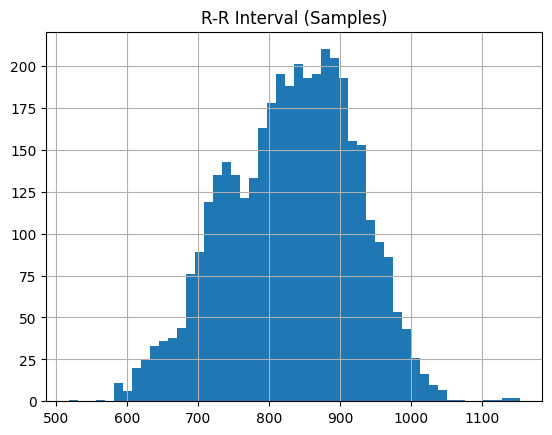

In [28]:
full_df.hist(bins=50)

In [29]:
# Calculate the interquartile range (IQR)
full_q1 = np.percentile(full_df, 25)
full_q3 = np.percentile(full_df, 75)
full_iqr_rr = full_q3 - full_q1

# Calculate the lower and upper bounds for outliers
full_lower_bound = full_q1 - 1.5 * full_iqr_rr
full_upper_bound = full_q3 + 1.5 * full_iqr_rr

# Remove outliers from the data
full_df_clean = full_df[(full_df >= full_lower_bound) & (full_df <= full_upper_bound)]
full_df_clean = pd.DataFrame(full_df_clean)

In [30]:
full_df_clean.shape

(3847, 1)

array([[<Axes: title={'center': 'R-R Interval (Samples)'}>]], dtype=object)

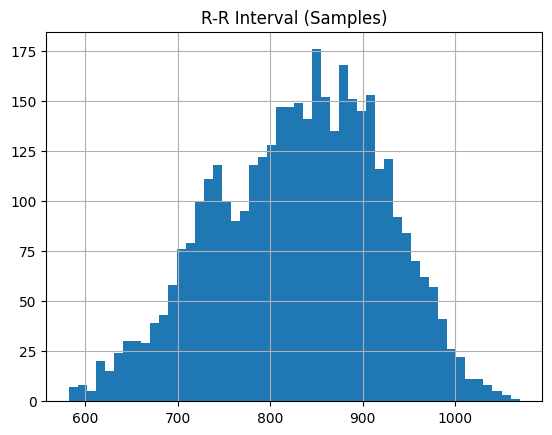

In [31]:
full_df_clean.hist(bins=50)

In [44]:
i = 0
for filename in os.listdir(filepath):
  df = pd.read_csv(filepath + filename)

  # Remove outliers from the data
  df_clean = df[(df['R-R Interval (Samples)'] >= full_lower_bound) & (df['R-R Interval (Samples)'] <= full_upper_bound)]
  data_clean = df_clean['R-R Interval (Samples)']

  peaks = len(data_clean)
  #Average heart rate
  bpm = peaks/5
  # Calculate the mean HRV
  mean_rr = np.mean(data_clean)
  # Calculate the range
  range_rr = np.rint(np.max(data_clean) - np.min(data_clean))
  # Calculate the interquartile range (IQR)
  q1 = np.percentile(data_clean, 25)
  q3 = np.percentile(data_clean, 75)
  iqr_rr = q3 - q1
  # Calculate the variance
  var_rr = np.var(data_clean)
  # Calculate the standard deviation
  std_rr = np.std(data_clean)
  # Calculate the coefficient of variation
  cv_rr = std_rr / np.mean(data_clean) * 100

  bpm_arr.append(bpm)
  mean_arr.append(mean_rr)
  range_arr.append(range_rr)
  iqr_arr.append(iqr_rr)
  var_arr.append(var_rr)
  std_arr.append(std_rr)
  cv_arr.append(cv_rr)
  gender_arr.append(patient_gender[i])
  age_arr.append(patient_age[i])
  classification.append(0)
  name.append(filename)
  i += 1

IsADirectoryError: [Errno 21] Is a directory: '/content/.config'

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Correct file path where the CSV was written
data = pd.read_csv('datasets/GoogleDriveCSVs/cebsdb_matrix.csv')

# Plot the histogram for 'Variance'
data['Variance'].hist(bins=50)

# Show the plot
plt.show()

# Print the maximum value of 'Variance'
print("Maximum Variance:", np.max(data['Variance']))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the two datasets
data1 = pd.read_csv('datasets/GoogleDriveCSVs/cebsdb_matrix.csv')
data2 = pd.read_csv('datasets/GoogleDriveCSVs/cebsdb_matrix1.csv')

# Display the first few rows for inspection
print("First few rows of cebsdb_matrix.csv:")
print(data1.head())

print("\nFirst few rows of cebsdb_matrix1.csv:")
print(data2.head())

# Compare basic statistics
print("\n--- Variance Statistics ---")
print("cebsdb_matrix.csv Variance stats:")
print(data1['Variance'].describe())

print("\ncebsdb_matrix1.csv Variance stats:")
print(data2['Variance'].describe())

# Compare BPM statistics
print("\n--- BPM Statistics ---")
print("cebsdb_matrix.csv BPM stats:")
print(data1['BPM'].describe())

print("\ncebsdb_matrix1.csv BPM stats:")
print(data2['BPM'].describe())

# Plot histograms for comparison
plt.figure(figsize=(14, 7))

# Histogram for 'Variance' from both datasets
plt.subplot(1, 2, 1)
data1['Variance'].hist(bins=50, alpha=0.5, color='blue', label='cebsdb_matrix.csv')
data2['Variance'].hist(bins=50, alpha=0.5, color='red', label='cebsdb_matrix1.csv')
plt.title('Variance Comparison')
plt.legend()

# Histogram for 'BPM' from both datasets
plt.subplot(1, 2, 2)
data1['BPM'].hist(bins=50, alpha=0.5, color='blue', label='cebsdb_matrix.csv')
data2['BPM'].hist(bins=50, alpha=0.5, color='red', label='cebsdb_matrix1.csv')
plt.title('BPM Comparison')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
for i in range(12):
  print('charis'+str(i+1))
  data[data.File.str.contains('charis'+str(i+1))]['Variance'].hist(bins=50, legend = True)

In [ ]:
np.max(data['Variance'])

In [ ]:
data = pd.read_csv(filefolder + filename)

In [ ]:
# Calculate the interquartile range (IQR)
q1 = np.percentile(df['R-R Interval (Samples)'], 25)
q3 = np.percentile(df['R-R Interval (Samples)'], 75)
iqr_rr = q3 - q1

In [ ]:
# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr_rr
upper_bound = q3 + 1.5 * iqr_rr

In [ ]:
# Remove outliers from the data
df_clean = df[(df['R-R Interval (Samples)'] >= lower_bound) & (df['R-R Interval (Samples)'] <= upper_bound)]

In [ ]:
# Print the number of outliers removed
num_outliers = len(df) - len(df_clean)
print(f"Number of outliers removed: {num_outliers}")

In [ ]:
print(df_clean)
data_clean = df_clean['R-R Interval (Samples)']

In [ ]:
# Calculate the range
range_rr = np.max(data_clean) - np.min(data_clean)

In [ ]:
# Calculate the variance
var_rr = np.var(data_clean)

In [ ]:
# Calculate the standard deviation
std_rr = np.std(data_clean)

In [ ]:
# Calculate the coefficient of variation
cv_rr = std_rr / np.mean(data_clean) * 100

In [ ]:
# Print the results
print(f"Range: {range_rr:.2f}")
print(f"IQR: {iqr_rr:.2f}")
print(f"Variance: {var_rr:.2f}")
print(f"Standard deviation: {std_rr:.2f}")
print(f"Coefficient of variation: {cv_rr:.2f}%")

In [ ]:
for filename in os.listdir(filefolder):
  df = pd.read_csv(filefolder + filename)

  # Calculate the interquartile range (IQR)
  q1 = np.percentile(df['R-R Interval (Samples)'], 25)
  q3 = np.percentile(df['R-R Interval (Samples)'], 75)
  iqr_rr = q3 - q1

  # Calculate the lower and upper bounds for outliers
  lower_bound = q1 - 1.5 * iqr_rr
  upper_bound = q3 + 1.5 * iqr_rr

  # Remove outliers from the data
  df_clean = df[(df['R-R Interval (Samples)'] >= lower_bound) & (df['R-R Interval (Samples)'] <= upper_bound)]
  data_clean = df_clean['R-R Interval (Samples)']

  # Calculate the range
  range_rr = np.max(data_clean) - np.min(data_clean)
  # Calculate the interquartile range (IQR)
  q1 = np.percentile(data_clean, 25)
  q3 = np.percentile(data_clean, 75)
  iqr_rr = q3 - q1
  # Calculate the variance
  var_rr = np.var(data_clean)
  # Calculate the standard deviation
  std_rr = np.std(data_clean)
  # Calculate the coefficient of variation
  cv_rr = std_rr / np.mean(data_clean) * 100

  range_arr.append(range_rr)
  iqr_arr.append(iqr_rr)
  var_arr.append(var_rr)
  std_arr.append(std_rr)
  cv_arr.append(cv_rr)
